# Long Short-Term Memory (LSTM)

# Explanation

### What is LSTM? 
LSTM stands for long short-term memory networks, used in the field of Deep Learning. It is a variety of recurrent neural networks (RNNs) that are capable of learning long-term dependencies, especially in sequence prediction problems. 
LSTM has feedback connections, i.e., it is capable of processing the entire sequence of data, apart from single data points such as images.
This finds application in speech recognition, machine translation, etc. LSTM is a special kind of RNN, which shows outstanding performance on a large variety of problems.

## imports to LSTM algoruthim

In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

## Getting the data


In [2]:
data = pd.read_csv('data/AirPassengers.csv',parse_dates=['Month'])

## Exploratory Data Analysis

In [14]:
f = Forecaster(
    y=data['#Passengers'],
    current_dates=data['Month'],
    DateStartActuals=1949/1/1,
    DateEndActuals=1950/12/1,
    Freq='MS',
    ForecastLength=0,
    Xvars=[],
    Differenced=0,
    TestLength=1,
    ValidationLength=1,
    ValidationMetric='rmse',
    CILevel=0.95,
    BootstrapSamples=100
)


### PACF (Partial Auto Correlation Function) plot, which measures how much the "value" variable is correlated to past values of itself and how far back a statistically significant correlation exists

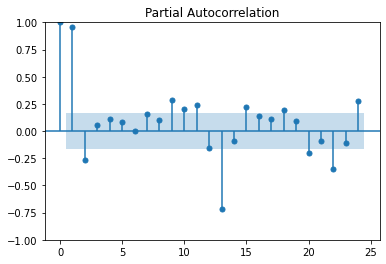

In [15]:
f.plot_pacf(lags=24)
plt.show()

# Decompose the series into its trend, seasonal, and residual parts

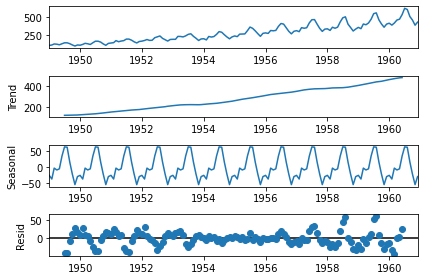

In [16]:
f.seasonal_decompose().plot()
plt.show()


In [17]:
f.adf_test(full_res=True)

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

# LSTM Forecasting

In [28]:
f.set_test_length(12)       # 1. 12 observations to test the results
f.generate_future_dates(12) # 2. 12 future points to forecast
f.set_estimator('lstm')     # 3. LSTM neural network

5/5 [==============================] - 0s 0s/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

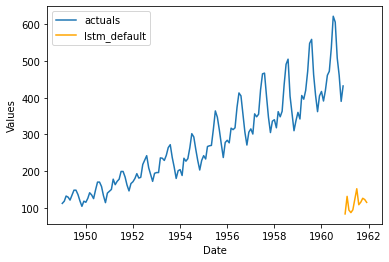

In [19]:
f.manual_forecast(call_me='lstm_default')
f.plot(models=['lstm_default'])

4/4 [==============================] - 0s 5ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

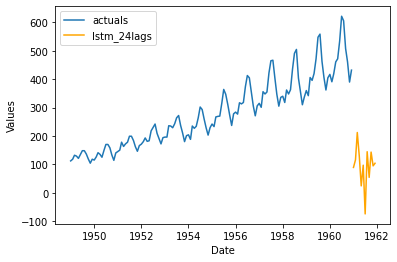

In [20]:
f.manual_forecast(call_me='lstm_24lags',lags=24)
f.plot(models=['lstm_24lags'])

Epoch 1/5
3/3 [==============================] - 2s 273ms/step - loss: 0.3513 - val_loss: 0.1126
Epoch 2/5
3/3 [==============================] - 0s 23ms/step - loss: 0.3285 - val_loss: 0.0980
Epoch 3/5
3/3 [==============================] - 0s 27ms/step - loss: 0.3055 - val_loss: 0.0829
Epoch 4/5
3/3 [==============================] - 0s 23ms/step - loss: 0.2809 - val_loss: 0.0679
Epoch 5/5
1/1 [==============================] - 0s 482ms/step
Epoch 1/5
3/3 [==============================] - 2s 262ms/step - loss: 0.4382 - val_loss: 0.1685
Epoch 2/5
3/3 [==============================] - 0s 27ms/step - loss: 0.4277 - val_loss: 0.1612
Epoch 3/5
3/3 [==============================] - 0s 31ms/step - loss: 0.4169 - val_loss: 0.1539
Epoch 4/5
3/3 [==============================] - 0s 19ms/step - loss: 0.4061 - val_loss: 0.1465
Epoch 5/5
4/4 [==============================] - 0s 5ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

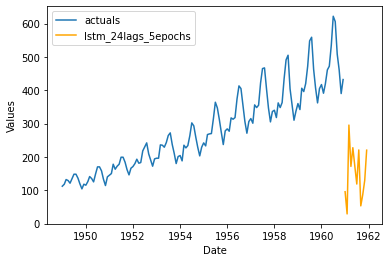

In [21]:
f.manual_forecast(call_me='lstm_24lags_5epochs',
                  lags=24,
                  epochs=5,
                  validation_split=.2,
                  shuffle=True)
f.plot(models=['lstm_24lags_5epochs'])

Epoch 1/25
3/3 [==============================] - 7s 858ms/step - loss: 0.4794 - val_loss: 0.1251
Epoch 2/25
3/3 [==============================] - 0s 50ms/step - loss: 0.4126 - val_loss: 0.0826
Epoch 3/25
3/3 [==============================] - 0s 54ms/step - loss: 0.3466 - val_loss: 0.0422
Epoch 4/25
3/3 [==============================] - 0s 58ms/step - loss: 0.2726 - val_loss: 0.0393
Epoch 5/25
3/3 [==============================] - 0s 58ms/step - loss: 0.1871 - val_loss: 0.0959
Epoch 6/25
3/3 [==============================] - 0s 67ms/step - loss: 0.1169 - val_loss: 0.1832
Epoch 7/25
3/3 [==============================] - 0s 65ms/step - loss: 0.1342 - val_loss: 0.2264
Epoch 8/25
3/3 [==============================] - 0s 58ms/step - loss: 0.1394 - val_loss: 0.1975
Epoch 9/25
1/1 [==============================] - 1s 1s/step
Epoch 1/25
3/3 [==============================] - 7s 765ms/step - loss: 0.4543 - val_loss: 0.1724
Epoch 2/25
3/3 [==============================] - 0s 50ms/step -

<AxesSubplot:xlabel='Date', ylabel='Values'>

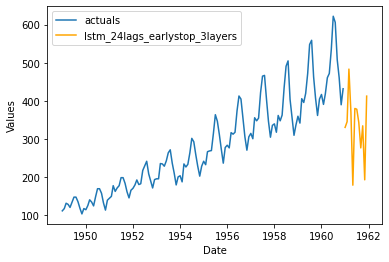

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))
f.plot(models=['lstm_24lags_earlystop_3layers'])

Epoch 1/15
3/3 [==============================] - 10s 1s/step - loss: 0.3888 - val_loss: 0.0423
Epoch 2/15
3/3 [==============================] - 1s 192ms/step - loss: 0.1652 - val_loss: 0.0683
Epoch 3/15
3/3 [==============================] - 1s 204ms/step - loss: 0.0978 - val_loss: 0.0430
Epoch 4/15
3/3 [==============================] - 1s 243ms/step - loss: 0.1232 - val_loss: 0.0680
Epoch 5/15
3/3 [==============================] - 1s 282ms/step - loss: 0.0978 - val_loss: 0.0998
Epoch 6/15
3/3 [==============================] - 1s 251ms/step - loss: 0.1022 - val_loss: 0.0607
Epoch 7/15
3/3 [==============================] - 1s 225ms/step - loss: 0.0941 - val_loss: 0.0474
Epoch 8/15
3/3 [==============================] - 1s 293ms/step - loss: 0.0970 - val_loss: 0.0525
Epoch 9/15
3/3 [==============================] - 1s 219ms/step - loss: 0.0897 - val_loss: 0.0479
Epoch 10/15
3/3 [==============================] - 1s 193ms/step - loss: 0.0876 - val_loss: 0.0419
Epoch 11/15
3/3 [====

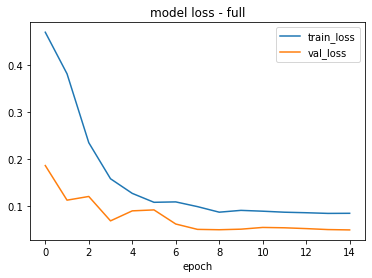

3/3 [==============================] - 0s 39ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

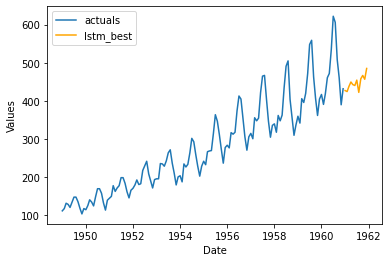

In [27]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)

f.plot(models=['lstm_best'])